In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import rasterio as rio
import folium
        
    
def overlay_image_on_puerto_rico(file_name, band_layer):
    band = rio.open(file_name).read(band_layer)
    m = folium.Map([lat,lon], zoom_start=8)
    folium.raster_layers.ImageOverlay(
        image=band,
        bounds = [[18.6,-67.3,],[17.9,-65.2]],
        colormap=lambda x: (1, 0, 0, x),
    ).add_to(m)
    return m

def plot_scaled(file_name):
    vmin, vmax = np.nanpercentile(file_name, (5,95))  # 5-95% stretch
    img_plt = plt.imshow(file_name, cmap='gray', vmin=vmin, vmax=vmax)
    plt.show()


{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 475, 'height': 148, 'count': 12, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.004491576420597608, 0.0, -67.32431391288841,
       0.0, 0.004491576420597608, 17.90015055109518)}


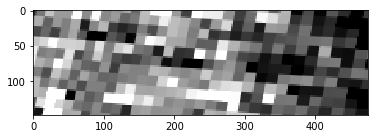

In [3]:
image_path = './eie_data/s5p_no2/s5p_no2_20180708T172237_20180714T190743.tif'
lat = 18.2; lon=-66.6
image = rio.open(image_path)
print(image.meta)#['transform'])
lat = image.meta['transform'][6]
lon = image.meta['transform'][2]
plot_scaled(image.read(1))
overlay_image_on_puerto_rico(image_path, band_layer=1)

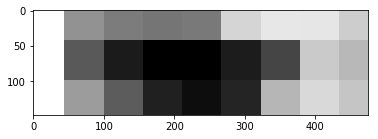

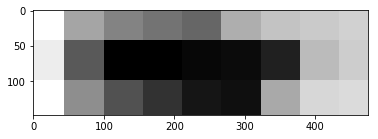

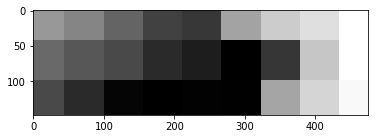

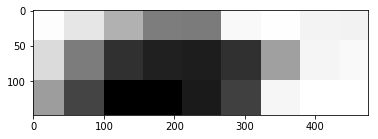

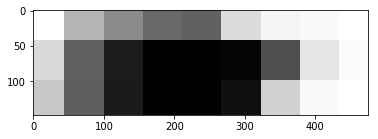

In [9]:
image_path_1 = './eie_data/gfs/gfs_2018070100.tif'
image_path_2 = './eie_data/gfs/gfs_2018070106.tif'
image_path_3 = './eie_data/gfs/gfs_2018070112.tif'
image_path_4 = './eie_data/gfs/gfs_2018070118.tif'
lat = 18.2; lon=-66.6
image_1 = rio.open(image_path_1)
image_2 = rio.open(image_path_2)
image_3 = rio.open(image_path_3)
image_4 = rio.open(image_path_4)
plot_scaled(image_1.read(2))
plot_scaled(image_2.read(2))
plot_scaled(image_3.read(2))
plot_scaled(image_4.read(2))
plot_scaled((image_1.read(2)/4+image_2.read(2)/4+image_3.read(2)/4+image_4.read(2)/4))


In [39]:
def write_to_raster(im_1, im_2, im_3, im_4, path):
    new_dataset = rio.open(path.replace("gfs", "cleaned_gfs"), 'w', driver='GTiff', height=im_1.shape[0], width=im_1.shape[1], count=6, dtype=im_1.meta['dtype'], crs=im_1.meta['crs'], transform=im_1.meta['transform'])
    for i in range(1, 7):
        new_dataset.write((im_1.read(i)+im_2.read(i)+im_3.read(i)+im_4.read(i))/4,i)

print(image_1.meta)
#write_to_raster(image_1, image_2, image_3, image_4, "")

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 475, 'height': 148, 'count': 6, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.004491576420597608, 0.0, -67.32354977311168,
       0.0, -0.004491576420597608, 18.56520446703891)}


{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 475, 'height': 148, 'count': 6, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.004491576420597608, 0.0, -67.32354977311168,
       0.0, -0.004491576420597608, 18.56520446703891)}


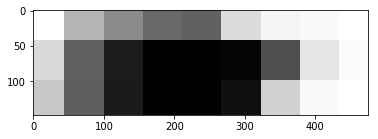

In [40]:
image_saved = rio.open('a_new.tif')
print(image_saved.meta)
plot_scaled(image_saved.read(2))

In [41]:
import os
year=2018
month=7
day=1
path_root = './eie_data/gfs/gfs_'
dir_list = os.listdir('./eie_data/gfs/')
#CHECK FOR NAN VALUES
#TRY TO FIND OUT WHY NEW TIFS ARE LARGER THAN OLD TIFS
while (year != 2019 or month != 6 or day != 30):
    year_str = str(year)
    month_str = str(month)
    day_str = str(day)
    if len(month_str) < 2:
        month_str = "0" + month_str
    if len(day_str) < 2:
        day_str = "0" + day_str
    path = path_root + year_str + month_str + day_str + "XX.tif"
    filename = "gfs_" + year_str + month_str + day_str + "XX.tif"
    day += 1
    if day > 31:
        day = 1
        month += 1
        if month > 12:
            month = 1
            year += 1
    if filename.replace("XX", "00") in dir_list:
        image_1 = rio.open(path.replace("XX", "00"))
        image_2 = rio.open(path.replace("XX", "06"))
        image_3 = rio.open(path.replace("XX", "12"))
        image_4 = rio.open(path.replace("XX", "18"))
        write_to_raster(image_1, image_2, image_3, image_4, path)
    